## Описание проекта

Компания купила крупный сервис для чтения книг по подписке. Необходимо проанализировать базу данных, которая содержит информацию о книгах, издательствах, авторах, а также пользовательские обзоры книг.

**Цель исследования**

Проанализировать базу данных для формирования ценностного предложения для нового продукта

### Обзор данных

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
!pip install psycopg2-binary

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})



In [3]:
query = """
SELECT *
FROM books
LIMIT 5;
"""
pd.io.sql.read_sql(query, con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
query = """
SELECT *
FROM authors
LIMIT 5;
"""
pd.io.sql.read_sql(query, con = engine)


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [5]:
query = """
SELECT *
FROM publishers
LIMIT 5;
"""
pd.io.sql.read_sql(query, con = engine)


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [6]:
query = """
SELECT *
FROM ratings
LIMIT 5;
"""
pd.io.sql.read_sql(query, con = engine)


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [7]:
query = """
SELECT *
FROM reviews
LIMIT 5;
"""
pd.io.sql.read_sql(query, con = engine)


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


Таким образом, наша база данных содержит следующую информацию о книгах и издательствах:  

Таблица **books**  

Содержит данные о книгах:  

book_id — идентификатор книги;  
author_id — идентификатор автора;  
title — название книги;  
num_pages — количество страниц;  
publication_date — дата публикации книги;  
publisher_id — идентификатор издателя.  

Таблица **authors**  

Содержит данные об авторах:  

author_id — идентификатор автора;  
author — имя автора.  

Таблица **publishers**  

Содержит данные об издательствах:  

publisher_id — идентификатор издательства;  
publisher — название издательства;  

Таблица **ratings**  

Содержит данные о пользовательских оценках книг:  

rating_id — идентификатор оценки;  
book_id — идентификатор книги;  
username — имя пользователя, оставившего оценку;  
rating — оценка книги.  

Таблица **reviews**  

Содержит данные о пользовательских обзорах на книги:  

review_id — идентификатор обзора;  
book_id — идентификатор книги;  
username — имя пользователя, написавшего обзор;  
text — текст обзора.  

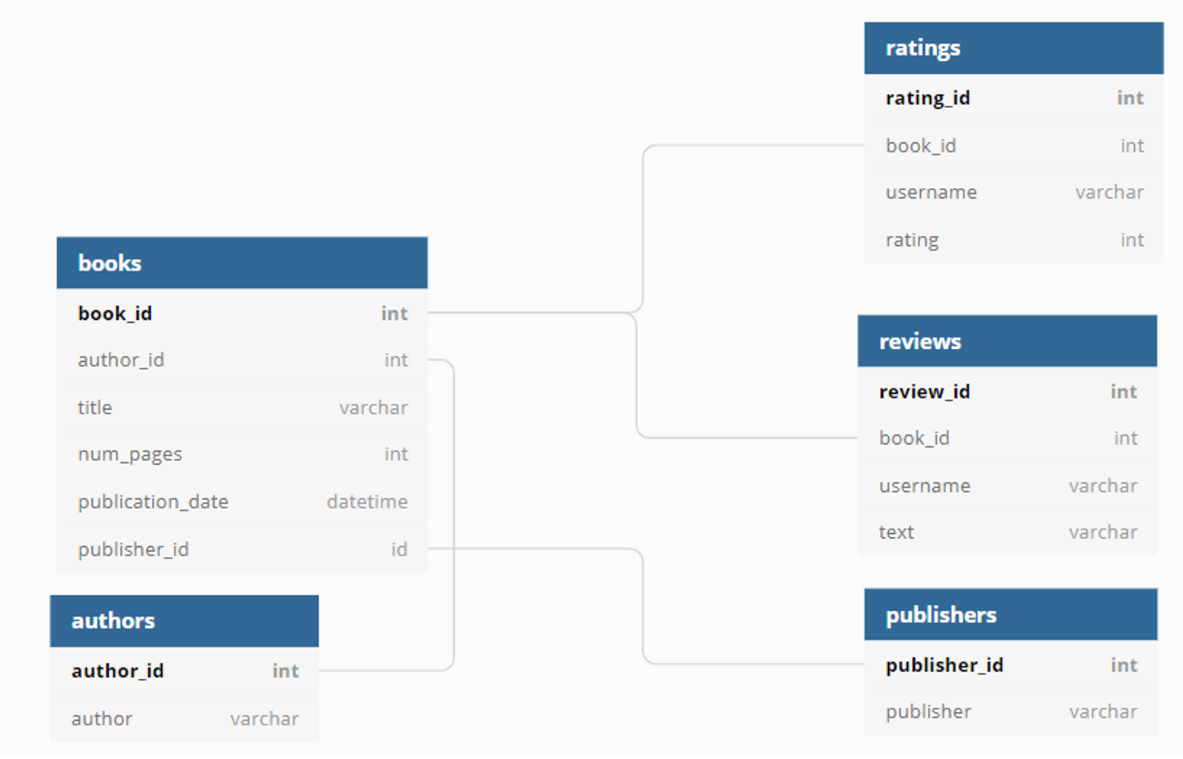

## Запросы к базе данных

### Посчитайте, сколько книг вышло после 1 января 2000 года

In [8]:
query = """
SELECT COUNT(book_id)       
FROM books
where publication_date > '2000-01-01';
"""
pd.io.sql.read_sql(query, con = engine)

,count
0,819


#### Вывод:

После 1 января 2000 вышло 819 книг

### Для каждой книги посчитайте количество обзоров и среднюю оценку

In [9]:
query = """
SELECT title,
       COUNT(DISTINCT review_id) as count_review,
       AVG(rating) as avg_rating 
FROM books as b 
LEFT JOIN reviews as r ON b.book_id = r.book_id
LEFT JOIN ratings as ra ON b.book_id = ra.book_id
GROUP BY b.book_id
ORDER BY avg_rating DESC, 
         count_review DESC
;
"""
pd.io.sql.read_sql(query, con = engine)

,title,count_review,avg_rating
0,A Dirty Job (Grim Reaper #1),4,5.00
1,School's Out—Forever (Maximum Ride #2),3,5.00
2,Moneyball: The Art of Winning an Unfair Game,3,5.00
3,Arrows of the Queen (Heralds of Valdemar #1),2,5.00
4,Wherever You Go There You Are: Mindfulness Me...,2,5.00
...,...,...,...
995,The World Is Flat: A Brief History of the Twen...,3,2.25
996,Drowning Ruth,3,2.00
997,His Excellency: George Washington,2,2.00
998,Junky,2,2.00


#### Вывод:

в нашем распоряжении 1000 книг, отсортированные по средней оценке и количеству обзоров. Книга с наибольшим рейтингом и количеством обзоров (среди средних оценок 5) -A Dirty Job (Grim Reaper #1)

### Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [10]:
query = """
SELECT p.publisher      
FROM publishers as p
JOIN books as b ON p.publisher_id = b.publisher_id
WHERE num_pages > 50
GROUP BY p.publisher
ORDER BY COUNT(book_id) DESC
LIMIT 1
;
"""
pd.io.sql.read_sql(query, con = engine)

,publisher
0,Penguin Books


#### Вывод:

Издательство, которое выпустило наибольшее число книг толще 50 страниц — Penguin Books

### Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [11]:
query = """
SELECT author,
       AVG(rating) AS avg_rating
FROM authors AS a
JOIN books AS b ON a.author_id = b.author_id
JOIN ratings AS r ON b.book_id = r.book_id
WHERE b.book_id IN (SELECT book_id
                    FROM ratings 
                    GROUP BY book_id
                    HAVING COUNT(rating_id) >= 50
                    ORDER BY COUNT(rating_id) DESC)
GROUP BY author
ORDER BY avg_rating DESC
LIMIT 1
;
"""
pd.io.sql.read_sql(query, con = engine)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287097


#### Вывод

J.K. Rowling/Mary GrandPré- aвтор книг с самой высокой средней оценкой среди книг, которым поставили 50 и более оценок

### Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [12]:
query = """
SELECT AVG(review_cnt)
FROM (SELECT username,
             COUNT(review_id) AS review_cnt
      FROM reviews
      GROUP BY username
      HAVING username in (SELECT username
                          FROM ratings
                          GROUP BY username
                          HAVING count(rating_id) > 48)
    ) as AVG_review_cnt
"""
pd.io.sql.read_sql(query, con = engine)

,avg
0,24.0


#### Вывод

Пользователи, поставившие более 48 оценок, в среднем пишут по 24 обзора

## Вывод

Анализ базы данных показал следующее: 
   - После 1 января 2000 вышло 819 книг
   - В нашем распоряжении 1000 книг, отсортированные по средней оценке и количеству обзоров. Книга с наибольшим рейтингом и количеством обзоров (среди средних оценок 5) -A Dirty Job (Grim Reaper #1)
   - Издательство, которое выпустило наибольшее число книг толще 50 страниц — Penguin Books  
   - J.K. Rowling/Mary GrandPré- aвтор книг с самой высокой средней оценкой среди книг равной 4.287097, которым поставили 50 и более оценок  
   - Пользователи, поставившие более 48 оценок, в среднем пишут по 24 обзора  